Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5071 - accuracy: 0.4494 - val_loss: 1.2578 - val_accuracy: 0.5416
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1466 - accuracy: 0.5935 - val_loss: 1.0643 - val_accuracy: 0.6232
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9997 - accuracy: 0.6487 - val_loss: 1.0286 - val_accuracy: 0.6347
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9052 - accuracy: 0.6807 - val_loss: 0.9362 - val_accuracy: 0.6714
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8326 - accuracy: 0.7080 - val_loss: 0.9343 - val_accuracy: 0.6687
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7735 - accuracy: 0.7281 - val_loss: 0.8627 - val_accuracy: 0.7013
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7255 - accuracy: 0.7454 - val_loss: 0.8510 -

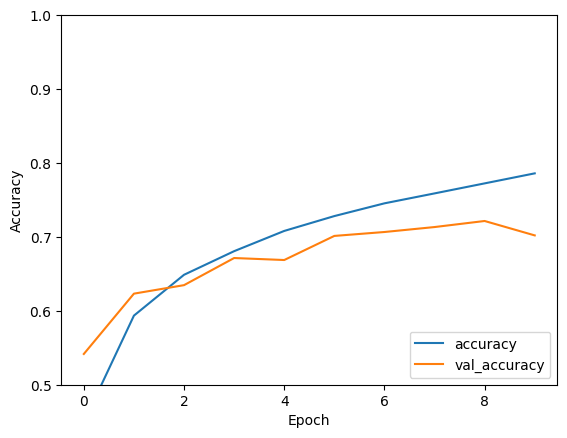

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

